<h1>Projekt do VVP - Planety</h1>

Abychom mohli simulaci planet vůbec spustit je potřeba zadat do parametrů příkazu alespoň cestu ke souboru s daty, tedy --input_data. Ostatní hodnoty jsou defaultně nastavené:
- n (počet iterací) = 100
- timestep (časový interval) = 86400 s = 1 den
- print_mode = 0 (použitelné pro vykreslení všech simulací)
- random = 0 (tedy žádná randomizace)

Zde můžeme vidět úplně nejjednodušší vykreslení

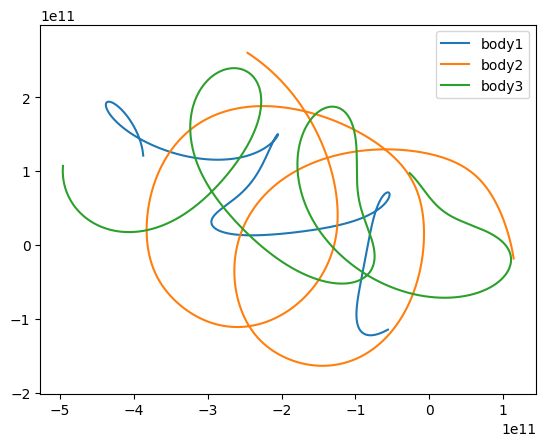

In [64]:
%run projekt/main.py --input_file "projekt/input_data/B3.json" --n 50000 --timestep 86400 --print_mode 0 --random 0

Nyní to samé, ale v módu scatter, tedy musíme nastavit print_mode na 2.\
Můžeme zde vidět počáteční pozice planet (světlá barva) a taky jejich rychlosti v jednotlivých částech (podle gradientu barvy)

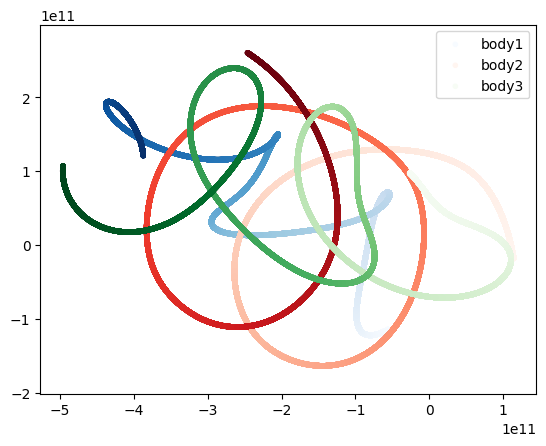

In [51]:
%run projekt/main.py --input_file "projekt/input_data/B3.json" --n 50000 --timestep 86400 --print_mode 2 --random 0

<h2>Sluneční soustava</h2>

Teď vykreslování sluneční soustavy (print_mode 1). Slunce je reprezentováno tečkou, aby vůbec bylo vidět. Reálný čas je 100 let.

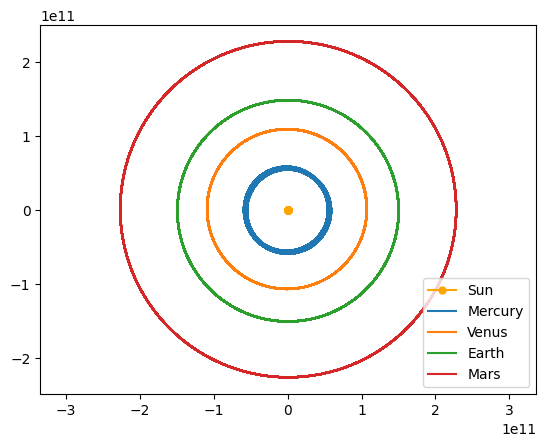

In [62]:
%run projekt/main.py --input_file "projekt/input_data/SS4.json" --n 36500 --timestep 86400 --print_mode 1 --random 0

Tady je simulace celé sluneční soustavy po dobu zhruba 27 let.

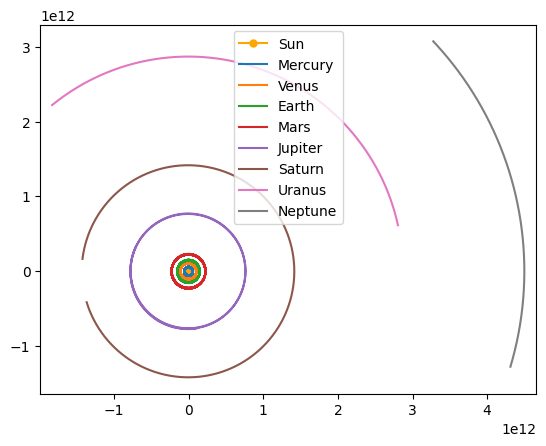

In [53]:
%run projekt/main.py --input_file "projekt/input_data/SS8.json" --n 10000 --timestep 86400 --print_mode 1 --random 0

<h2>Náhodné parametry</h2>

Zde je použit soubor o třech tělesech a náhodné parametry. Někde to generuje zajímavé trajektorie, stojí za to si to párkrát vyzkoušet.

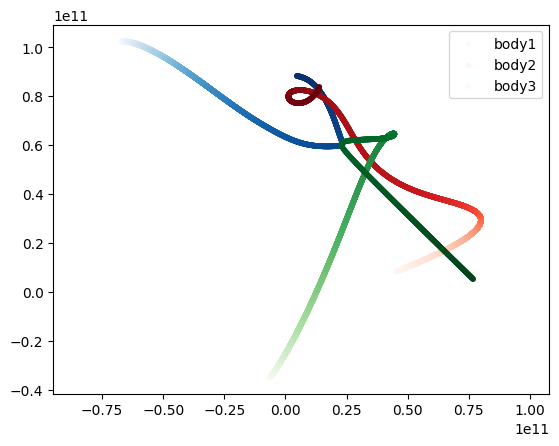

In [60]:
%run projekt/main.py --input_file "projekt/input_data/B3.json" --n 4000 --timestep 86400 --print_mode 2 --random 1



<h2>Animace</h2>

Pro ukládání trajektorií jako animace nastavíme print_mode na hodnotu 3. Zde si můžeme naanimovat pohyb sluneční soustavy.

MovieWriter Pillow unavailable; using Pillow instead.


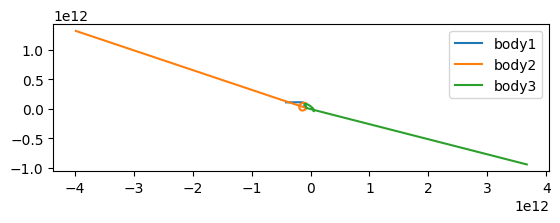

In [73]:
%run projekt/main.py --input_file "projekt/input_data/B3.json" --n 5000 --timestep 300000 --print_mode 3 --random 1